In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen para organizar
image = cv2.imread('img/scan.jpg')
image2=image.copy()
image3=image.copy()

# Convertir a escala de grises
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Encontrar bordes con la función Canny
edged = cv2.Canny(gray, 30, 200)

# Encontrar contornos
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_SIMPLE)

print("Number of Contours found = " + str(len(contours)))

# Dibujar los contornos
# Usar '-1' para que aparezcan dibujados todos los contornos
cv2.drawContours(image, contours,-1, (0,255,0), 3)

plt.figure(figsize=(20,20))
plt.imshow(image)

Number of Contours found = 171


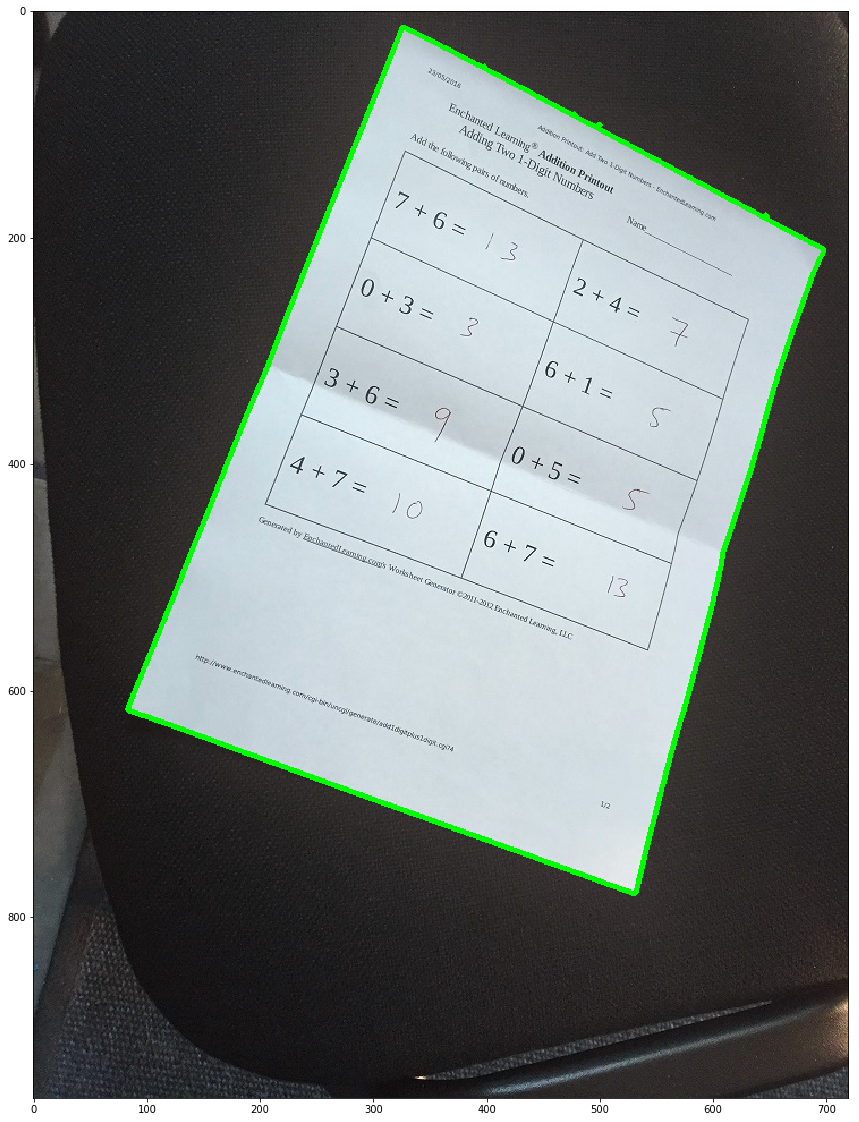

In [3]:
# Función para calcular el area que encierra cada contorno

def get_contour_areas(contours):
    # returns the areas of all contours as list
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

# Ordenar los contornos según el area que les corresponde

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Dibujar el contorno de mayor area

cv2.drawContours(image2, sorted_contours,0, (0,255,0), 3)

plt.figure(figsize=(20,20))
plt.imshow(image2)

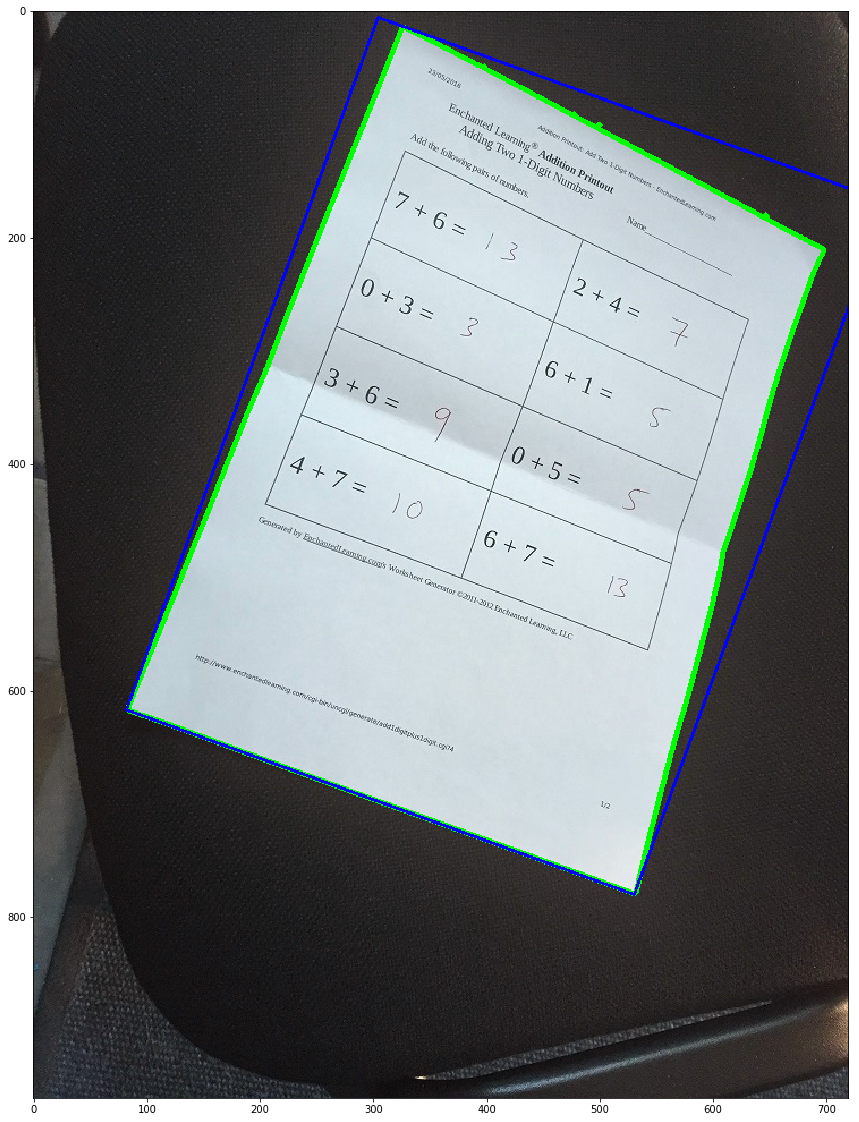

In [4]:
# Aproximar el contorno con un paralelogramo definido por 4 puntos.

cnt = sorted_contours[0]
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(image2,[box],0,(0,0,255),2)
plt.figure(figsize=(20,20))
plt.imshow(image2)

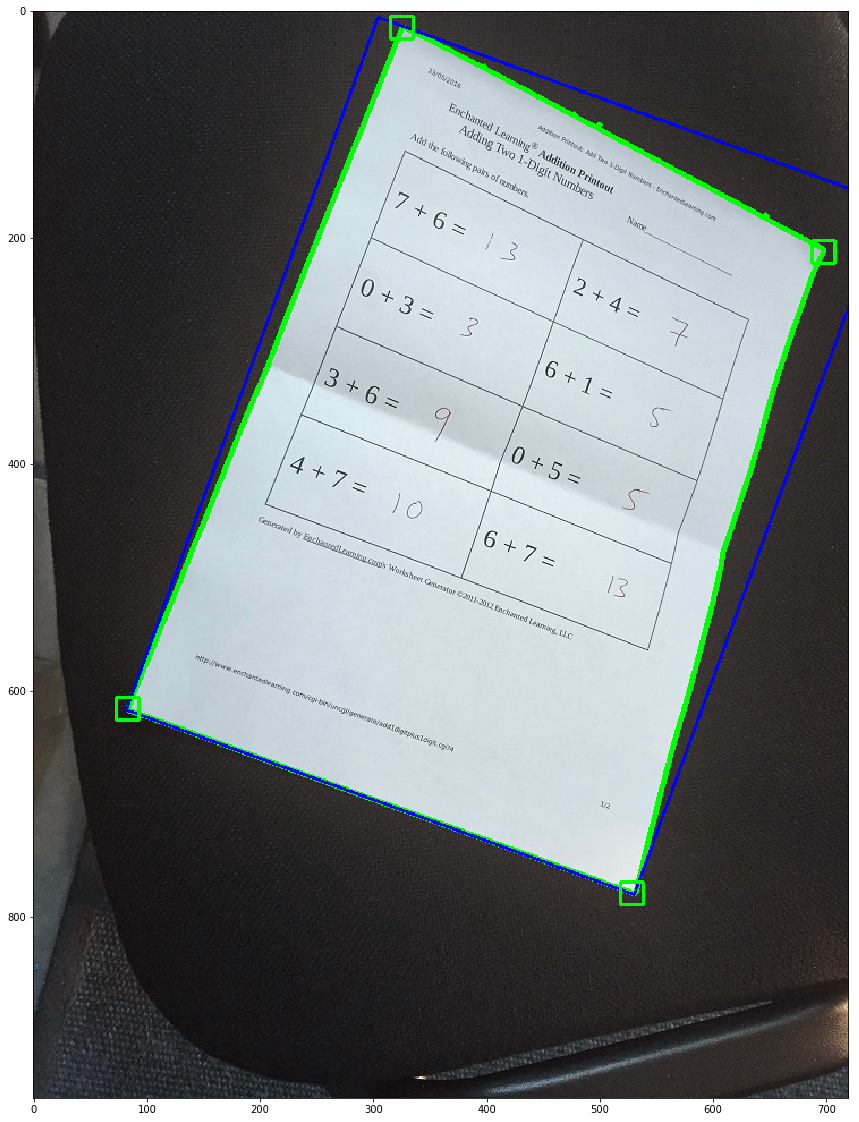

In [5]:
# Encontrar puntos extremos para determinar las esquinas de la imagen

cnt=sorted_contours[0]
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

cv2.rectangle(image2,(leftmost[0]-10,leftmost[1]-10),(leftmost[0]+10,leftmost[1]+10),(0,255,0), 2)
cv2.rectangle(image2,(rightmost[0]-10,rightmost[1]-10),(rightmost[0]+10,rightmost[1]+10),(0,255,0), 2)
cv2.rectangle(image2,(topmost[0]-10,topmost[1]-10),(topmost[0]+10,topmost[1]+10),(0,255,0), 2)
cv2.rectangle(image2,(bottommost[0]-10,bottommost[1]-10),(bottommost[0]+10,bottommost[1]+10),(0,255,0), 2)

plt.figure(figsize=(20,20))
plt.imshow(image2)


In [6]:
# encontrando vectores que indican que tan rotada esta la hoja
[vx,vy,x,y] = cv2.fitLine(box, cv2.DIST_L2,0,0.01,0.01)

In [7]:
# Calculando la tangente para determinar el angulo de rotación
tan=-vy[0]/vx[0]

In [8]:
# tangente inversa para saber el angulo

np.arctan(tan)*180/3.1416

69.94763296737845

In [9]:
# condición necesaria para no tener problemas si la oja viene rotada hacia del otro lado 

angulo=90-np.abs(np.arctan(tan)*180/3.1416)
if np.arctan(tan)*180/3.1416 < 0:
    angulo=-angulo

In [10]:
# centro respecto al que se realizará la rotación

centro_caja=cv2.moments(box)
cx = int(centro_caja['m10'] / centro_caja['m00'])
cy = int(centro_caja['m01'] / centro_caja['m00'])

In [11]:
height, width = image2.shape[:2]

# Rotar la imagen lo suficiente para poder clasificar los puntos extremos en superior izquierdo y derecho e inferior izquierdo y derecho

rotation_matrix = cv2.getRotationMatrix2D((cx, cy), angulo-10, 1)

rotated_image = cv2.warpAffine(image3, rotation_matrix, (width, height))


#plt.figure(figsize=(20,20))
#plt.imshow(rotated_image)

rotated_image2=rotated_image.copy()
rotated_image3=rotated_image.copy()
rotated_image4=rotated_image.copy()

# Grayscale
gray = cv2.cvtColor(rotated_image2,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_SIMPLE)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(rotated_image, contours,-1, (0,255,0), 3);



Number of Contours found = 71


Number of Contours found = 71


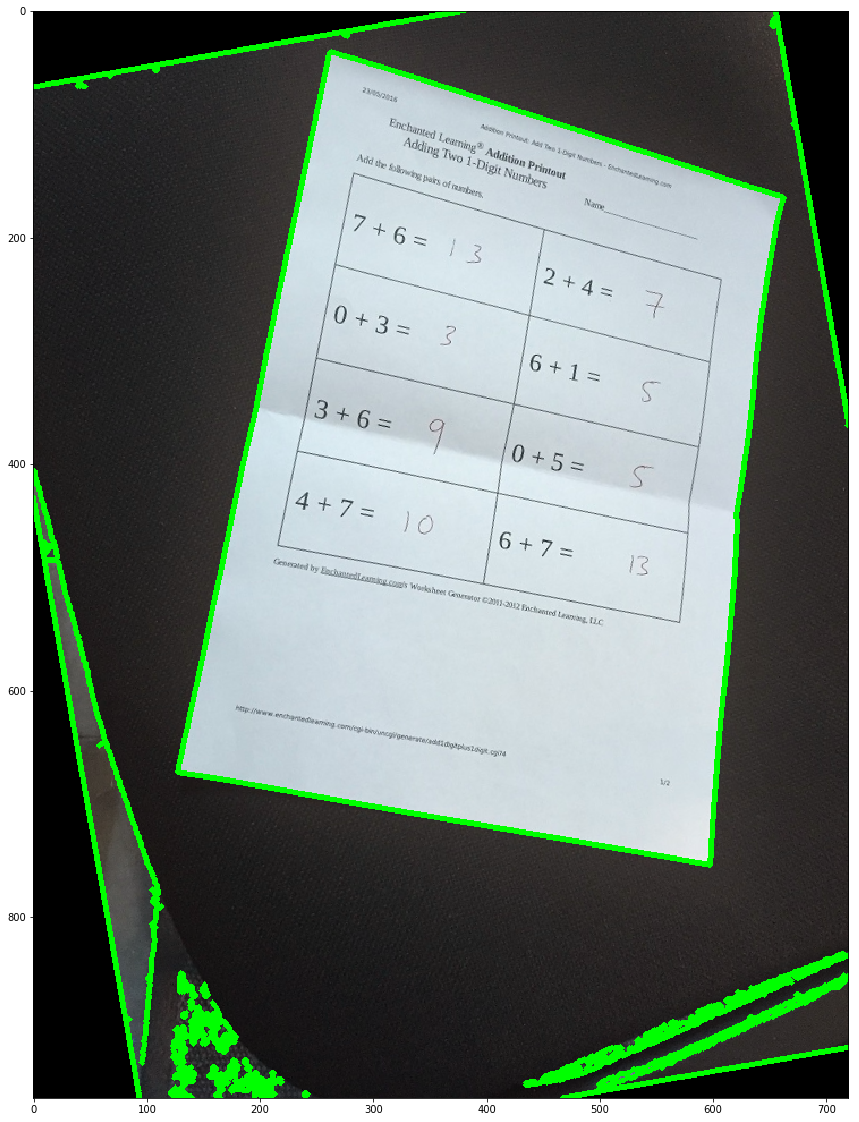

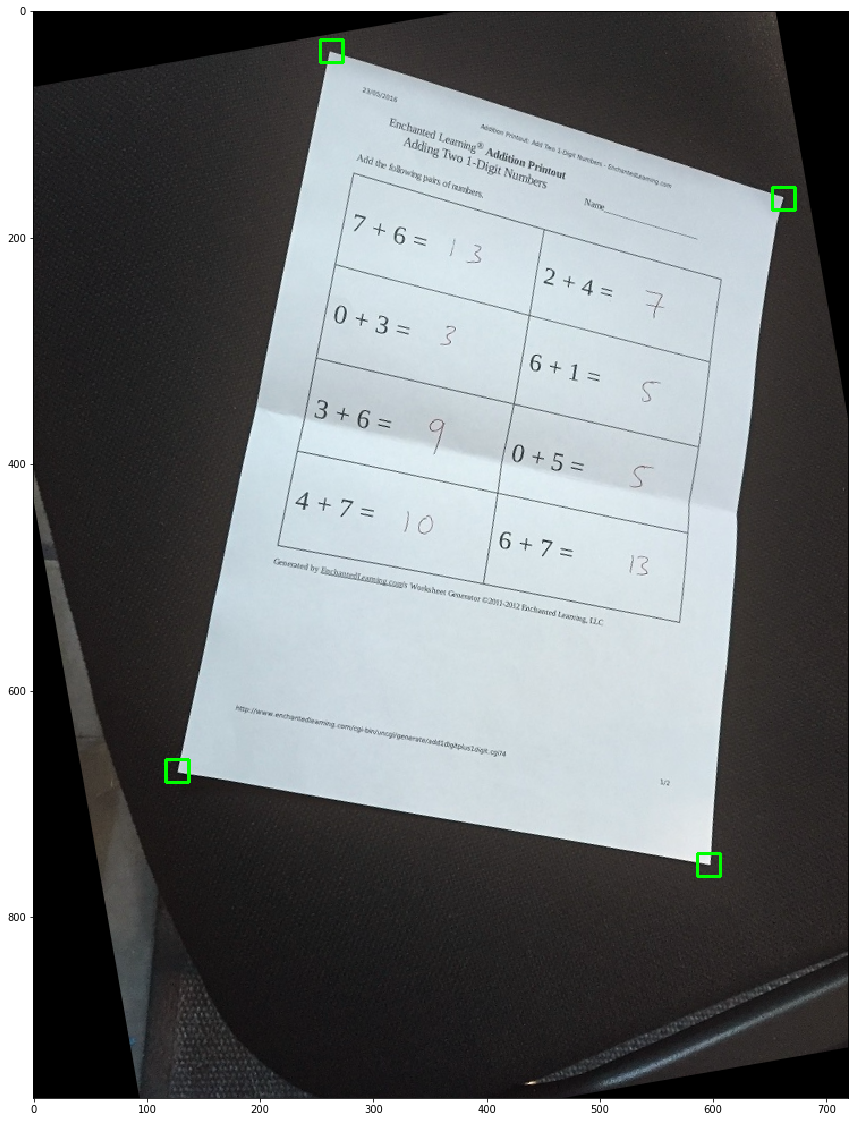

In [12]:

# Grayscale
gray = cv2.cvtColor(rotated_image2,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_SIMPLE)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(rotated_image, contours,-1, (0,255,0), 3)

plt.figure(figsize=(20,20))
plt.imshow(rotated_image)


# Function we'll use to display contour area

def get_contour_areas(contours):
    # returns the areas of all contours as list
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

cv2.drawContours(rotated_image2, sorted_contours,0, (0,255,0), 3)

#plt.figure(figsize=(20,20))
#plt.imshow(rotated_image2)

cnt=sorted_contours[0]
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

cv2.rectangle(rotated_image3,(leftmost[0]-10,leftmost[1]-10),(leftmost[0]+10,leftmost[1]+10),(0,255,0), 2)
cv2.rectangle(rotated_image3,(rightmost[0]-10,rightmost[1]-10),(rightmost[0]+10,rightmost[1]+10),(0,255,0), 2)
cv2.rectangle(rotated_image3,(topmost[0]-10,topmost[1]-10),(topmost[0]+10,topmost[1]+10),(0,255,0), 2)
cv2.rectangle(rotated_image3,(bottommost[0]-10,bottommost[1]-10),(bottommost[0]+10,bottommost[1]+10),(0,255,0), 2)

plt.figure(figsize=(20,20))
plt.imshow(rotated_image3)

In [13]:
# Codigo para clasificar los puntos como superior izquierdo y derecho e inferior izquierdo y derecho

a=np.matrix(leftmost)
b=np.matrix(rightmost)
c=np.matrix(topmost)
d=np.matrix(bottommost)

centro_caja=cv2.moments(cnt)
cx = int(centro_caja['m10'] / centro_caja['m00'])
cy = int(centro_caja['m01'] / centro_caja['m00'])
cm=np.matrix([cx,cy])

am=a-cm
bm=b-cm
cm=c-cm
dm=d-cm



if am[0,0] >= 0 and am[0,1] >= 0:
    p04 = a[0,0]
    p14 = a[0,1]
elif am[0,0] >= 0 and am[0,1] <= 0:
    p03 = a[0,0]
    p13 = a[0,1]
elif am[0,0] <= 0 and am[0,1] <= 0:
    p02 = a[0,0]
    p12 = a[0,1]
elif am[0,0] <= 0 and am[0,1] >= 0: 
    p01 = a[0,0]
    p11 = a[0,1]
if bm[0,0] >= 0 and bm[0,1] >= 0:
    p04 = b[0,0]
    p14 = b[0,1]
elif bm[0,0] >= 0 and bm[0,1] <= 0:
    p03 = b[0,0]
    p13 = b[0,1]
elif bm[0,0] <= 0 and bm[0,1] <= 0:
    p02 = b[0,0]
    p12 = b[0,1]
elif bm[0,0] <= 0 and bm[0,1] >= 0: 
    p01 = b[0,0]
    p11 = b[0,1]
if cm[0,0] >= 0 and cm[0,1] >= 0:
    p04 = c[0,0]
    p14 = c[0,1]
elif cm[0,0] >= 0 and cm[0,1] <= 0:
    p03 = c[0,0]
    p13 = c[0,1]
elif cm[0,0] <= 0 and cm[0,1] <= 0:
    p02 = c[0,0]
    p12 = c[0,1]
elif cm[0,0] <= 0 and cm[0,1] >= 0: 
    p01 = c[0,0]
    p11 = c[0,1]
if dm[0,0] >= 0 and dm[0,1] >= 0:
    p04 = d[0,0]
    p14 = d[0,1]
elif dm[0,0] >= 0 and dm[0,1] <= 0:
    p03 = d[0,0]
    p13 = d[0,1]
elif dm[0,0] <= 0 and dm[0,1] <= 0:
    p02 = d[0,0]
    p12 = d[0,1]
elif dm[0,0] <= 0 and dm[0,1] >= 0: 
    p01 = d[0,0]
    p11 = d[0,1]


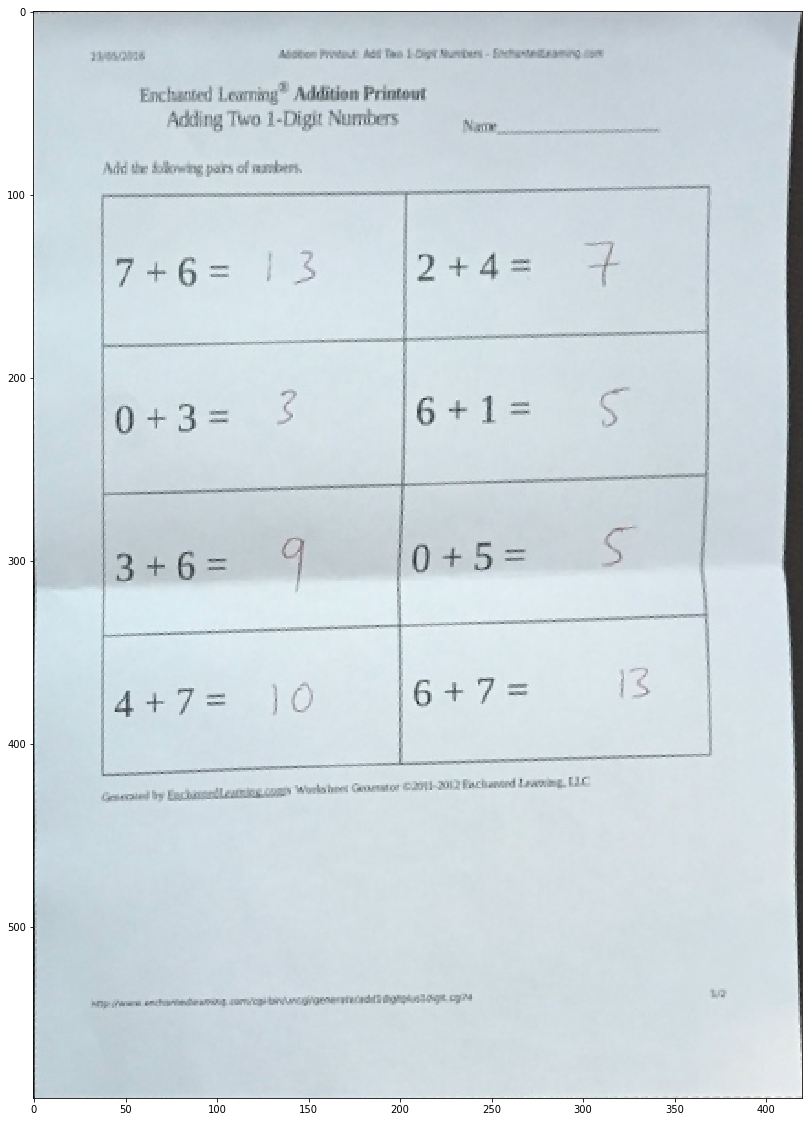

In [15]:
# Cordinates of the 4 corners of the original image
points_A = np.float32([[p02,p12], [p03,p13], [p01,p11], [p04,p14]])

# Cordinates of the 4 corners of the desired output
# We use a ratio of an A4 Paper 1 : 1.41
points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])
 
# Use the two sets of four points to compute 
# the Perspective Transformation matrix, M    
M = cv2.getPerspectiveTransform(points_A, points_B)
 
warped = cv2.warpPerspective(rotated_image4, M, (420,594))

plt.figure(figsize=(20,20))
plt.imshow(warped)